In [107]:
# importing necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
track_df = pd.read_csv("tracks.csv", header=[0,1,2])
columns = list(track_df.columns)
columns[0] = "track_id"
track_df.columns = columns

track_df.head()

# info on the track iself

,track_id,"(album, comments, Unnamed: 1_level_2)","(album, date_created, Unnamed: 2_level_2)","(album, date_released, Unnamed: 3_level_2)","(album, engineer, Unnamed: 4_level_2)","(album, favorites, Unnamed: 5_level_2)","(album, id, Unnamed: 6_level_2)","(album, information, Unnamed: 7_level_2)","(album, listens, Unnamed: 8_level_2)","(album, producer, Unnamed: 9_level_2)",...,"(track, information, Unnamed: 43_level_2)","(track, interest, Unnamed: 44_level_2)","(track, language_code, Unnamed: 45_level_2)","(track, license, Unnamed: 46_level_2)","(track, listens, Unnamed: 47_level_2)","(track, lyricist, Unnamed: 48_level_2)","(track, number, Unnamed: 49_level_2)","(track, publisher, Unnamed: 50_level_2)","(track, tags, Unnamed: 51_level_2)","(track, title, Unnamed: 52_level_2)"
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [109]:
track_df.columns

Index([                                            'track_id',
                  ('album', 'comments', 'Unnamed: 1_level_2'),
              ('album', 'date_created', 'Unnamed: 2_level_2'),
             ('album', 'date_released', 'Unnamed: 3_level_2'),
                  ('album', 'engineer', 'Unnamed: 4_level_2'),
                 ('album', 'favorites', 'Unnamed: 5_level_2'),
                        ('album', 'id', 'Unnamed: 6_level_2'),
               ('album', 'information', 'Unnamed: 7_level_2'),
                   ('album', 'listens', 'Unnamed: 8_level_2'),
                  ('album', 'producer', 'Unnamed: 9_level_2'),
                     ('album', 'tags', 'Unnamed: 10_level_2'),
                    ('album', 'title', 'Unnamed: 11_level_2'),
                   ('album', 'tracks', 'Unnamed: 12_level_2'),
                     ('album', 'type', 'Unnamed: 13_level_2'),
       ('artist', 'active_year_begin', 'Unnamed: 14_level_2'),
         ('artist', 'active_year_end', 'Unnamed: 15_lev

In [110]:
# we only need the genre from this csv
# creating a subset of the data

track_genre_df = track_df[["track_id", ("track", "genre_top", "Unnamed: 40_level_2")]]
track_genre_df = track_genre_df.dropna()

track_genre_df.head()

,track_id,"(track, genre_top, Unnamed: 40_level_2)"
0,2,Hip-Hop
1,3,Hip-Hop
2,5,Hip-Hop
3,10,Pop
9,134,Hip-Hop


In [111]:
track_genre_df[("track", "genre_top", "Unnamed: 40_level_2")].nunique()

16

In [112]:
features_df = pd.read_csv("features.csv", header=[0,1,2,3])
features_df = features_df.droplevel(3, axis=1)
columns = list(features_df.columns)
columns[0] = "track_id"
features_df.columns = columns

features_df.head()

,track_id,"(chroma_cens, kurtosis, 01)","(chroma_cens, kurtosis, 02)","(chroma_cens, kurtosis, 03)","(chroma_cens, kurtosis, 04)","(chroma_cens, kurtosis, 05)","(chroma_cens, kurtosis, 06)","(chroma_cens, kurtosis, 07)","(chroma_cens, kurtosis, 08)","(chroma_cens, kurtosis, 09)",...,"(tonnetz, std, 04)","(tonnetz, std, 05)","(tonnetz, std, 06)","(zcr, kurtosis, 01)","(zcr, max, 01)","(zcr, mean, 01)","(zcr, median, 01)","(zcr, min, 01)","(zcr, skew, 01)","(zcr, std, 01)"
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


In [113]:
final_df = pd.merge(track_genre_df, features_df, on="track_id")
final_df.head()

,track_id,"(track, genre_top, Unnamed: 40_level_2)","(chroma_cens, kurtosis, 01)","(chroma_cens, kurtosis, 02)","(chroma_cens, kurtosis, 03)","(chroma_cens, kurtosis, 04)","(chroma_cens, kurtosis, 05)","(chroma_cens, kurtosis, 06)","(chroma_cens, kurtosis, 07)","(chroma_cens, kurtosis, 08)",...,"(tonnetz, std, 04)","(tonnetz, std, 05)","(tonnetz, std, 06)","(zcr, kurtosis, 01)","(zcr, max, 01)","(zcr, mean, 01)","(zcr, median, 01)","(zcr, min, 01)","(zcr, skew, 01)","(zcr, std, 01)"
0,2,Hip-Hop,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.0,2.089872,0.061448
1,3,Hip-Hop,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.0,1.716724,0.069330
2,5,Hip-Hop,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.0,2.193303,0.044861
3,10,Pop,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.0,3.542325,0.040800
4,134,Hip-Hop,0.918445,0.674147,0.577818,1.281117,0.933746,0.078177,1.199204,-0.175223,...,0.058766,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.0,1.806106,0.054623


In [114]:
X = final_df.drop(columns=[("track", "genre_top", "Unnamed: 40_level_2"), "track_id"])
y = final_df[("track", "genre_top", "Unnamed: 40_level_2")]

X.shape, y.shape

((49598, 518), (49598,))

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39678, 518), (9920, 518), (39678,), (9920,))

In [116]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
"Done"



'Done'

In [117]:
classifier.fit(X_train, y_train)
"Done"


'Done'

In [118]:
predicted = classifier.predict(X_test)
accuracy = classifier.score(X_test, y_test)
accuracy

0.4420362903225806

In [119]:
# For potentially better accuracy, lets try using multiple decision trees to make a random forest model

from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

RandomForestClassifier()

In [120]:
forest_predicted = forest.predict(X_test)
forest_accuracy = forest.score(X_test, y_test)
forest_accuracy

0.6212701612903225

<AxesSubplot: xlabel="('track', 'genre_top', 'Unnamed: 40_level_2')", ylabel='count'>

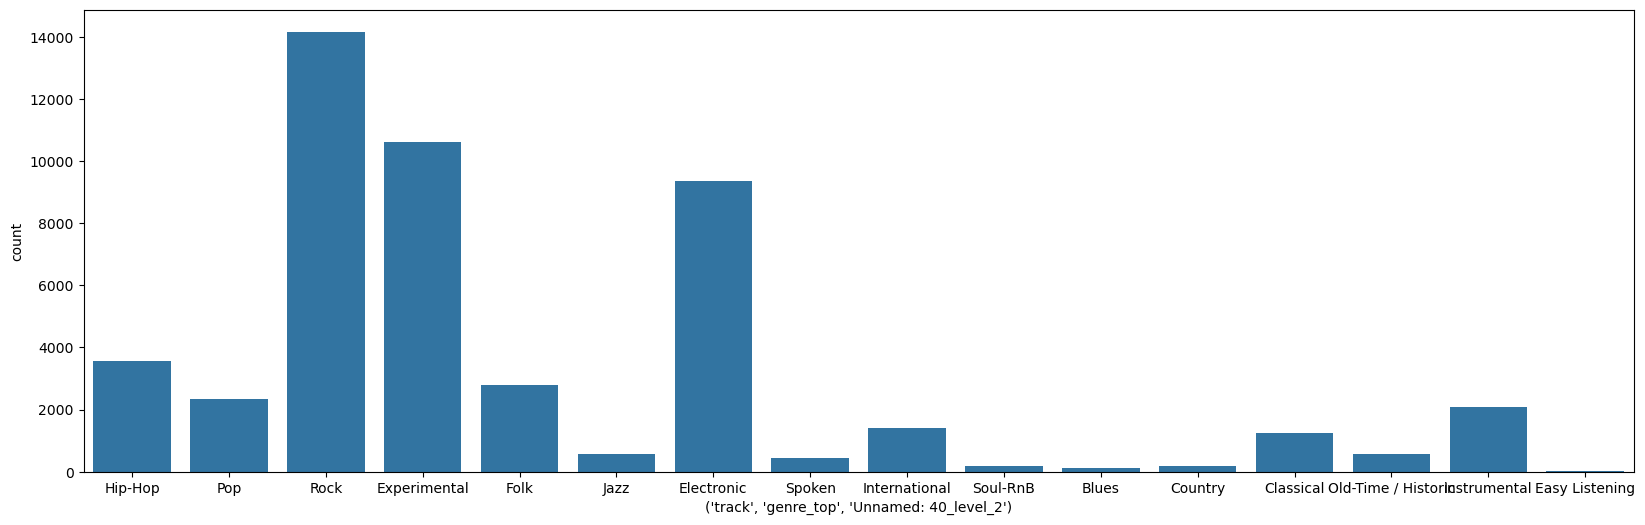

In [121]:


plt.figure(figsize=(20, 6)) 
sns.countplot(data=final_df, x=("track", "genre_top", "Unnamed: 40_level_2"))

In [123]:
elements, counts = np.unique(forest_predicted, return_counts=True)
elements, counts

(array(['Classical', 'Electronic', 'Experimental', 'Folk', 'Hip-Hop',
        'Instrumental', 'International', 'Jazz', 'Old-Time / Historic',
        'Pop', 'Rock', 'Spoken'], dtype=object),
 array([ 187, 2236, 2931,  460,  376,  117,   61,    4,  103,   19, 3404,
          22]))

In [124]:
from sklearn.metrics import classification_report

In [125]:
classification_report(y_test, forest_predicted)

/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'                     precision    recall  f1-score   support\n\n              Blues       0.00      0.00      0.00        20\n          Classical       0.80      0.65      0.71       231\n            Country       0.00      0.00      0.00        42\n     Easy Listening       0.00      0.00      0.00         3\n         Electronic       0.58      0.68      0.63      1920\n       Experimental       0.52      0.72      0.60      2135\n               Folk       0.61      0.50      0.55       567\n            Hip-Hop       0.80      0.43      0.56       702\n       Instrumental       0.57      0.16      0.25       413\n      International       0.82      0.18      0.29       282\n               Jazz       1.00      0.03      0.07       118\nOld-Time / Historic       0.93      0.88      0.91       109\n                Pop       0.42      0.02      0.03       445\n               Rock       0.69      0.83      0.76      2830\n           Soul-RnB       0.00      0.00      0.00        29\n     

In [126]:
# Class imbalance could be causing some problems

new_forest = RandomForestClassifier(n_estimators=100, class_weight="balanced")
new_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [127]:
new_forest_predicted = new_forest.predict(X_test)
new_forest_accuracy = new_forest.score(X_test, y_test)
new_forest_accuracy

0.608366935483871

In [128]:
classification_report(y_test, new_forest_predicted)

/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'                     precision    recall  f1-score   support\n\n              Blues       0.00      0.00      0.00        20\n          Classical       0.85      0.68      0.75       231\n            Country       1.00      0.02      0.05        42\n     Easy Listening       0.00      0.00      0.00         3\n         Electronic       0.58      0.65      0.61      1920\n       Experimental       0.51      0.69      0.59      2135\n               Folk       0.66      0.46      0.55       567\n            Hip-Hop       0.84      0.41      0.55       702\n       Instrumental       0.64      0.13      0.22       413\n      International       0.88      0.20      0.33       282\n               Jazz       0.47      0.06      0.11       118\nOld-Time / Historic       0.95      0.91      0.93       109\n                Pop       0.44      0.02      0.03       445\n               Rock       0.65      0.83      0.73      2830\n           Soul-RnB       0.00      0.00      0.00        29\n     

/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<AxesSubplot: >

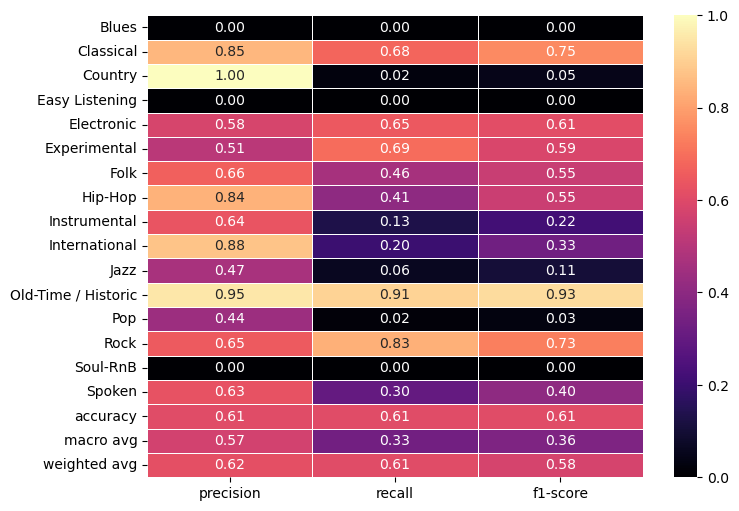

In [134]:
report = classification_report(y_test, new_forest_predicted, output_dict=True)
df_report = pd.DataFrame(report).iloc[:-1, :].T

plt.figure(figsize=(8, 6))

sns.heatmap(
    df_report.iloc[:, :], 
    annot=True,             
    cmap="magma",          
    fmt=".2f",            
    linewidths=.5   
)
            

/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<AxesSubplot: >

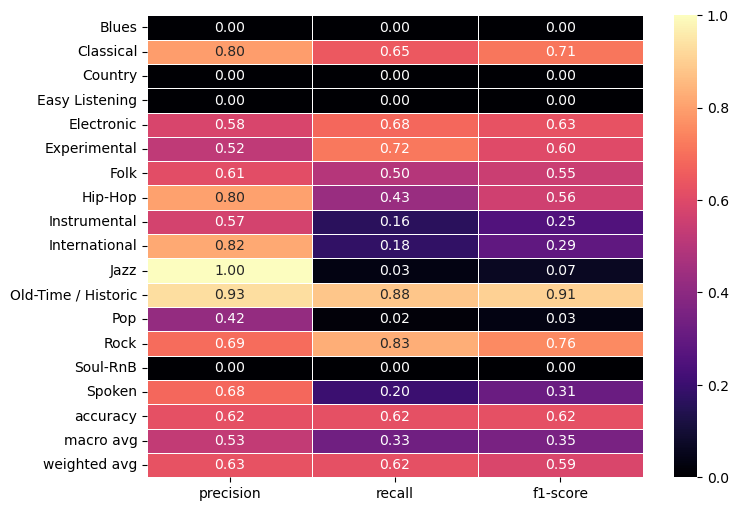

In [135]:
report = classification_report(y_test, forest_predicted, output_dict=True)
df_report = pd.DataFrame(report).iloc[:-1, :].T

plt.figure(figsize=(8, 6))

sns.heatmap(
    df_report.iloc[:, :], 
    annot=True,             
    cmap="magma",          
    fmt=".2f",            
    linewidths=.5   
)

<AxesSubplot: xlabel='predictions (with class balance)', ylabel='count'>

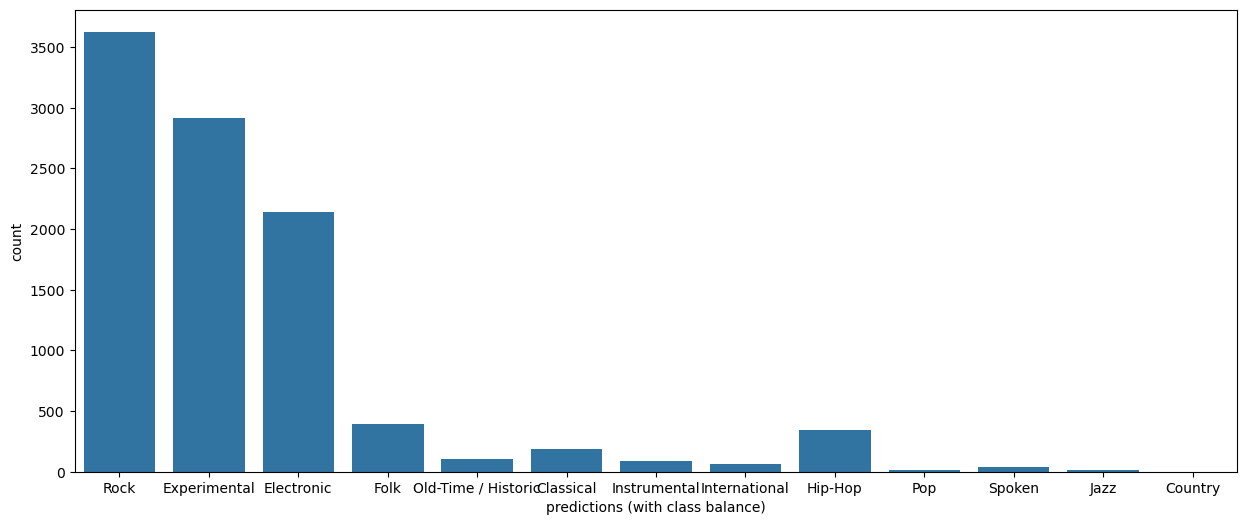

In [136]:
plt.figure(figsize=(15, 6))

prediction_series = pd.Series(new_forest_predicted, name="predictions (with class balance)")

sns.countplot(data=prediction_series.to_frame(), x='predictions (with class balance)')

<AxesSubplot: xlabel='predictions', ylabel='count'>

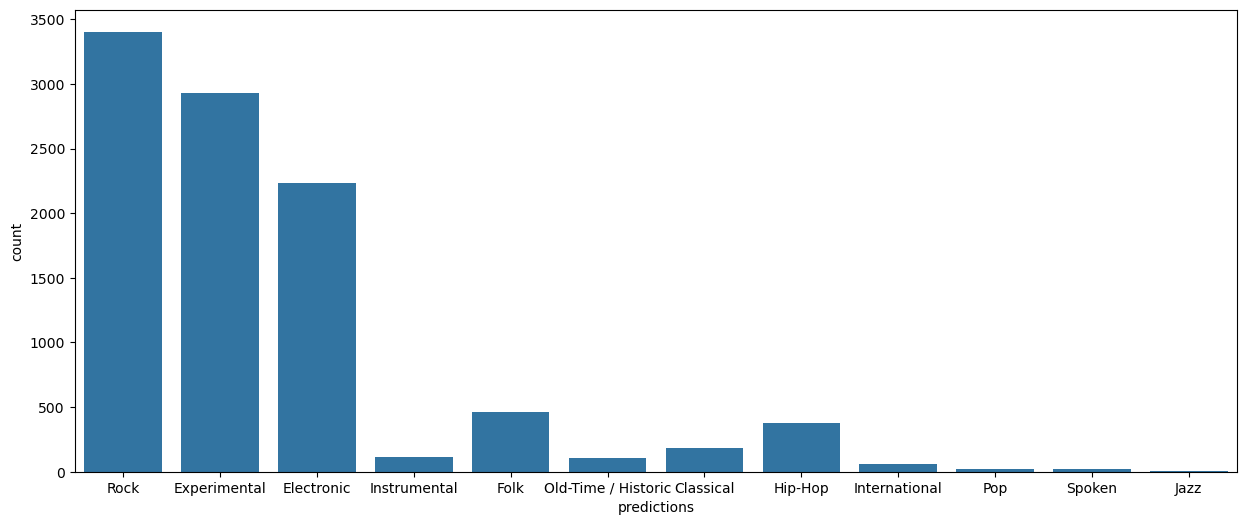

In [137]:
plt.figure(figsize=(15, 6))

prediction_series = pd.Series(forest_predicted, name="predictions")

sns.countplot(data=prediction_series.to_frame(), x='predictions')

<AxesSubplot: xlabel='actual', ylabel='count'>

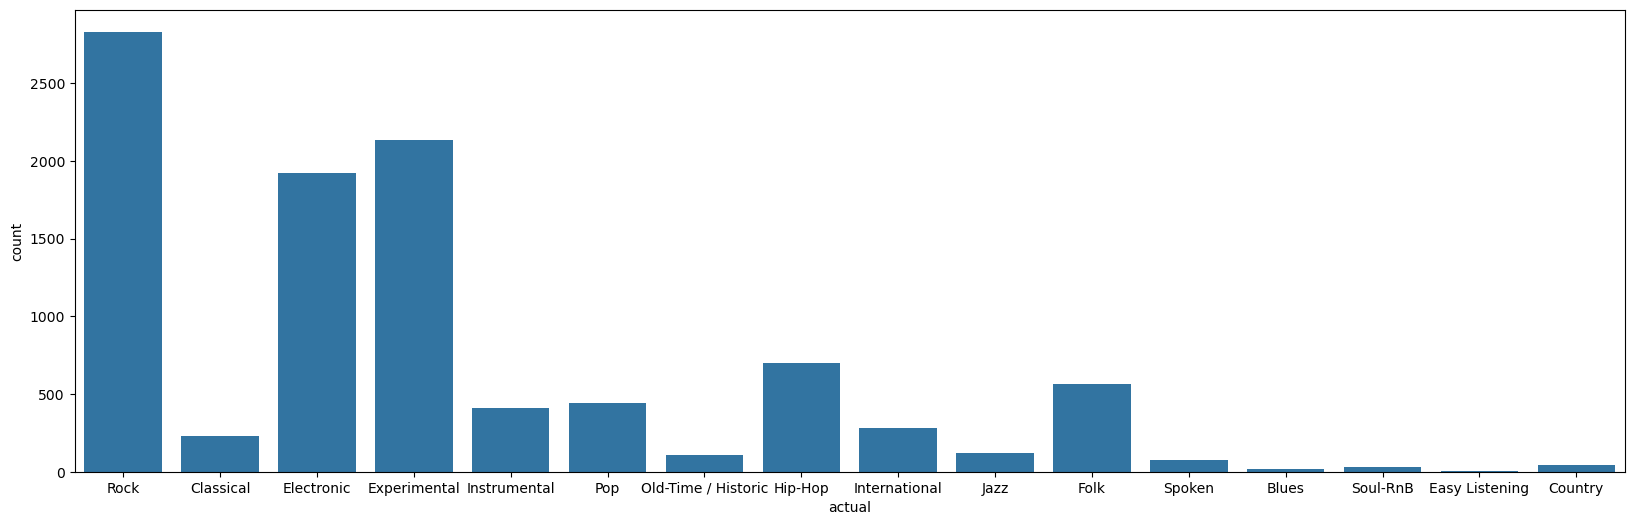

In [133]:
plt.figure(figsize=(20, 6)) 

genre_series = pd.Series(y_test, name="actual")

sns.countplot(data=genre_series.to_frame(), x='actual')